## Predicting Dallas Crimes
<br>AI Capstone 2020
<br>Ksenia Luu


https://gis.dallascityhall.com/shapefileDownload.aspx
<br/>https://residentmario.github.io/geoplot/user_guide/Working_with_Geospatial_Data.html

In [1]:
import pandas as pd
from pandas import DataFrame, Series
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#jupyter display options
pd.set_option('display.notebook_repr_html', True) 
pd.set_option('display.max_columns', 100) 
pd.set_option('display.max_rows', 100) 

# Plot Options
plt.style.use('seaborn')
plt.rc('font', size=14)
plt.rc('figure', titlesize=14)
plt.rc('axes', labelsize=14)
plt.rc('axes', titlesize=14)

### Import and Clean Data 
https://www.dallasopendata.com/Public-Safety/Police-Incident-location-and-pertinent-information/v3r6-776m

In [3]:
df = pd.read_csv('Police_Incidents.csv',low_memory=False)
df_copy = df.copy() 

In [4]:
df.info()

(631496, 100)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 631496 entries, 0 to 631495
Data columns (total 100 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   Incident Number w/year                     631496 non-null  object 
 1   Year of Incident                           631496 non-null  int64  
 2   Service Number ID                          631496 non-null  object 
 3   Watch                                      631496 non-null  int64  
 4   Call (911) Problem                         618147 non-null  object 
 5   Type of Incident                           631496 non-null  object 
 6   Type  Location                             630523 non-null  object 
 7   Type of Property                           149980 non-null  object 
 8   Incident Address                           628554 non-null  object 
 9   Apartment Number                           134795 non-null  object

In [5]:
df.head()

Incident Number w/year  Year of Incident Service Number ID  Watch  \
0            237372-2019              2019    237372-2019-01      3   
1            270366-2017              2017    270366-2017-01      1   
2            235039-2019              2019    235039-2019-01      1   
3            800469-2020              2020    800469-2020-01      1   
4            805791-2019              2019    805791-2019-01      3   

            Call (911) Problem  \
0                   09V - UUMV   
1                   09V - UUMV   
2  41/09 - THEFT - IN PROGRESS   
3                          NaN   
4                          NaN   

                                    Type of Incident  \
0         UNAUTHORIZED USE OF MOTOR VEH - AUTOMOBILE   
1         UNAUTHORIZED USE OF MOTOR VEH - AUTOMOBILE   
2             BURGLARY OF BUILDING - NO FORCED ENTRY   
3  FRAUD USE/POSS IDENTIFYING INFO-PRELIMINARY IN...   
4                                                BMV   

                 Type  Location            Type of Property  \
0    Highway, Street, Alley ETC                         NaN   
1      Parking Lot (All Others)                         NaN   
2    Apartment Complex/Building  Apartment Complex/Building   
3         Financial Institution                         NaN   
4  Bar/NightClub/DanceHall ETC.                         NaN   

       Incident Address Apartment Number  Reporting Area   Beat  \
0      6323 ROYALTON DR              NaN          1045.0  651.0   
1  13929 N CENTRAL EXPY              NaN          4522.0  644.0   
2      5050 CAPITOL AVE              NaN          1181.0  146.0   
3          6270 ORAM ST              103          1165.0  144.0   
4      2823 ST LOUIS ST              NaN          2078.0  153.0   

        Division  Sector Council District Target Area Action Grids  \
0  NORTH CENTRAL   650.0              D11                      NaN   
1  NORTH CENTRAL   640.0              D11                      NaN   
2        CENTRAL   140.0               D2             Ross Bennett   
3        CENTRAL   140.0              D14                      NaN   
4        CENTRAL   150.0               D2     Monument GoodLatimer   

            Community Date1 of Occurrence  Year1 of Occurrence  \
0                 NaN          11/24/2019               2019.0   
1                 NaN          11/25/2017               2017.0   
2  BryanHenderson_PFA          11/20/2019               2019.0   
3                 NaN          01/08/2018               2018.0   
4                 NaN          11/22/2019               2019.0   

  Month1 of Occurence Day1 of the Week Time1 of Occurrence  Day1 of the Year  \
0            November              Sun               20:00             328.0   
1            November              Sat               08:00             329.0   
2            November              Wed               17:00             324.0   
3             January              Mon               13:45               8.0   
4            November              Fri               23:00             326.0   

  Date2 of Occurrence   Year2 of Occurrence Month2 of Occurence  \
0           11/24/2019               2019.0            November   
1           11/27/2017               2017.0            November   
2           11/21/2019               2019.0            November   
3           12/09/2019               2019.0            December   
4           11/22/2019               2019.0            November   

  Day2 of the Week Time2 of Occurrence  Day2 of the Year  \
0              Sun               20:21             328.0   
1              Mon               14:00             331.0   
2              Thu               14:00             325.0   
3              Mon               13:45             343.0   
4              Fri               23:00             326.0   

           Date of Report   Date incident created  Offense Entered Year  \
0  11/24/2019 09:09:00 PM  11/24/2019 08:35:12 PM                  2019   
1  11/27/2017 11:00:00 PM  11/28/2017 

In [6]:
df=df.sort_values(by=['Date1 of Occurrence'])

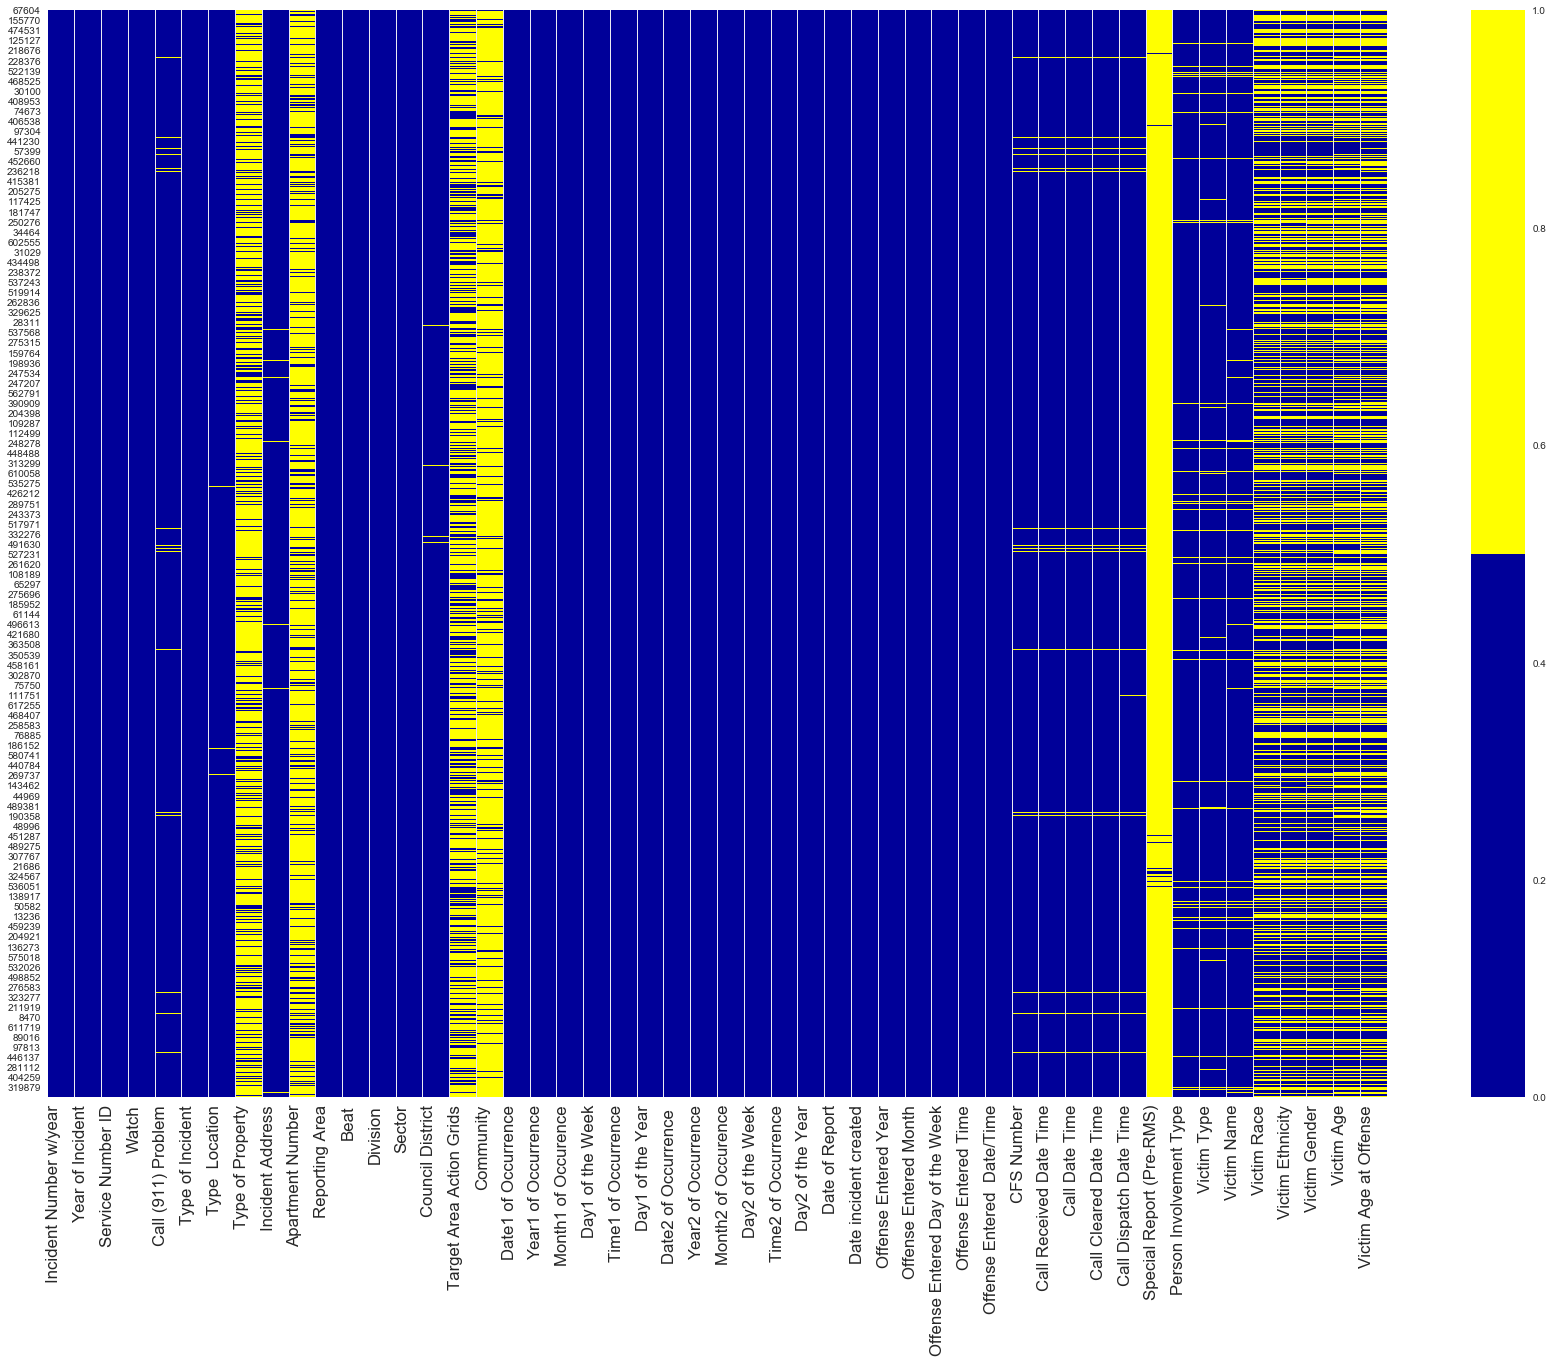

In [7]:
# visual for missing values by row/column
cols = df.columns[:50] # first 50 columns
colors = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
plt.subplots(figsize=(30,20))
plt.xticks(rotation=45,fontsize='large',horizontalalignment='right')
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colors))

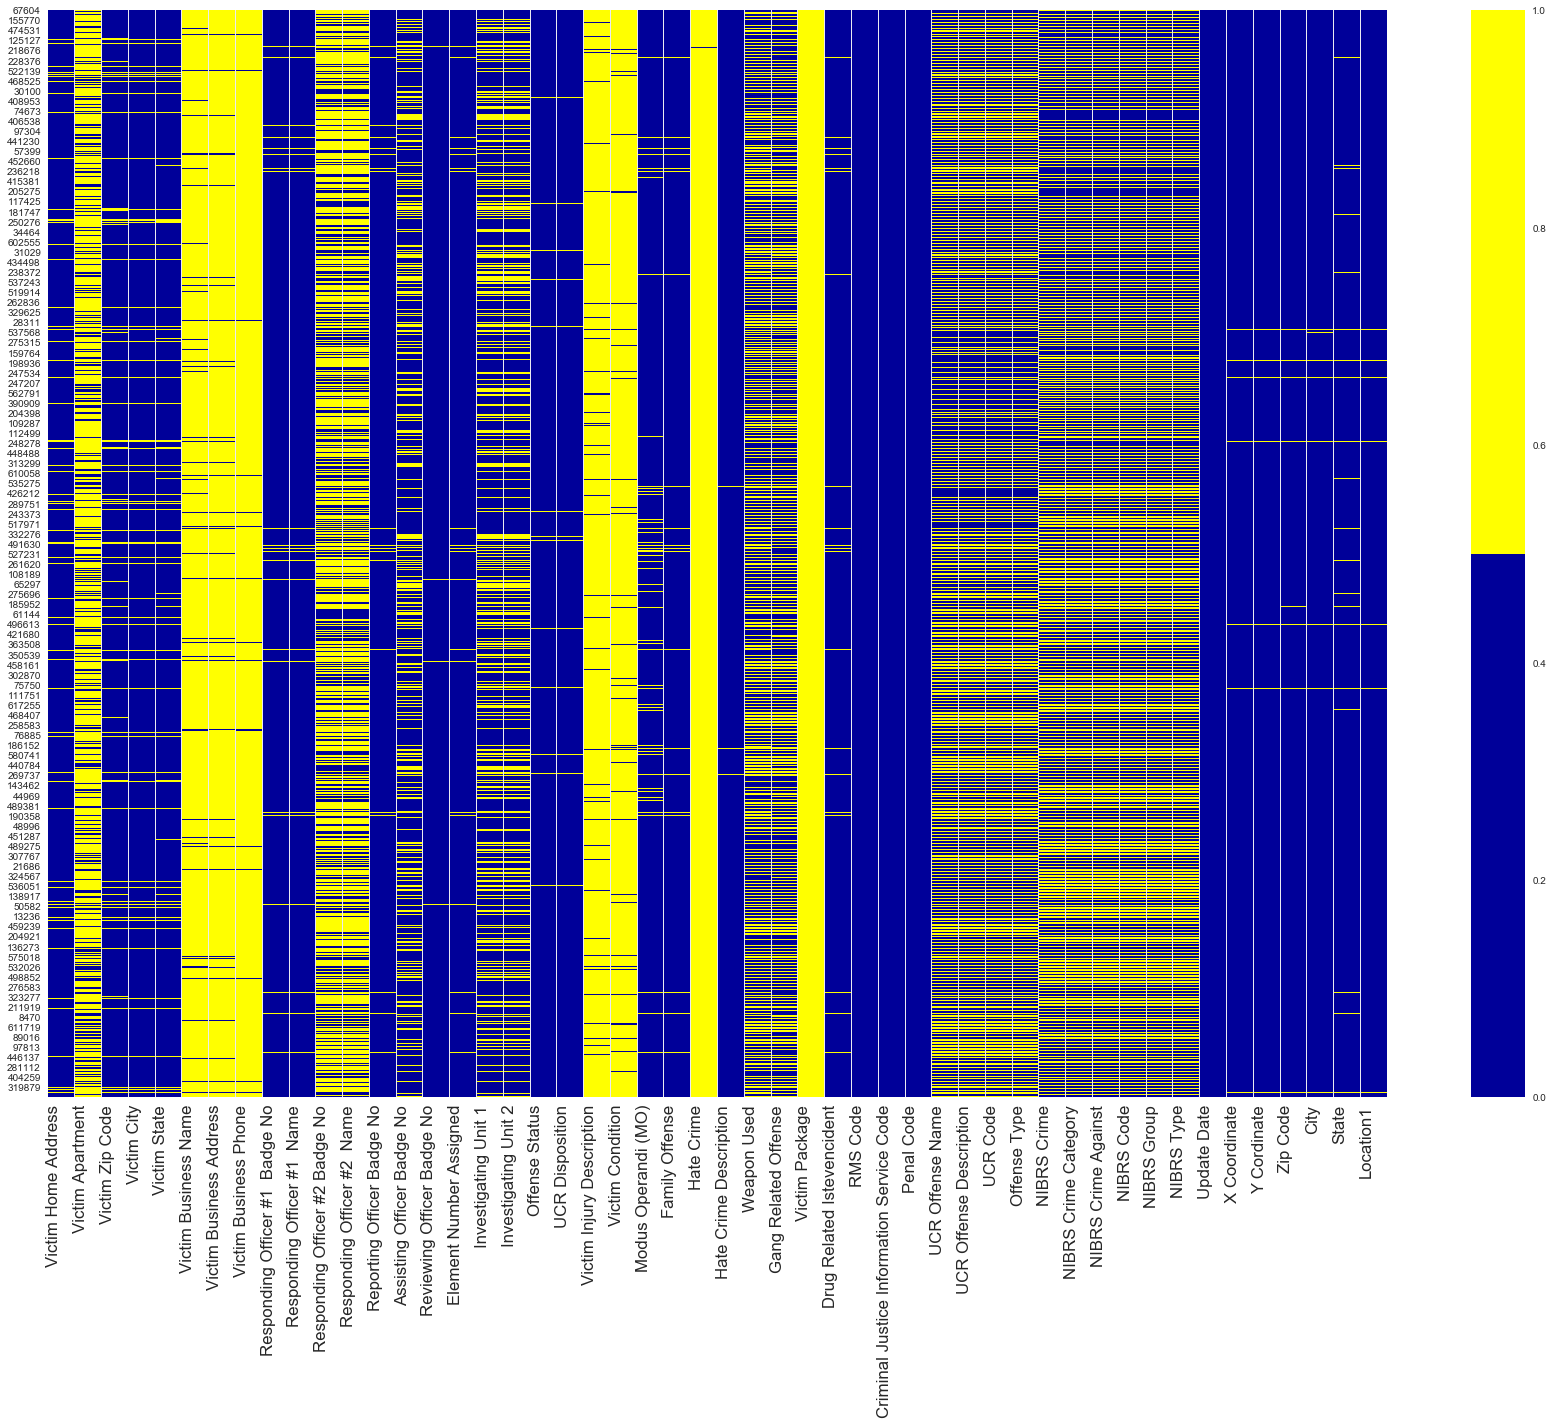

In [8]:
cols = df.columns[-50:] # first 50 columns
colors = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
plt.subplots(figsize=(30,20))
plt.xticks(rotation=45,fontsize='large',horizontalalignment='right')
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colors))

In [9]:
# clean up column names
df.columns = df.columns.str.strip().str.lower().str.replace('  ',' ').str.replace('/','_').str.replace('#','').str.replace('-','_').str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

# lower call columns values
#df = df.astype(str).apply(lambda x: x.str.lower())

### Tagging violent crimes 
https://www.dallasjustice.com/practice-areas/crimes-of-violence/

In [10]:
# crime types are within 4 columns/ check if there are any nulls between all 4
df[ df.loc[ :,['ucr_offense_name','ucr_offense_description','nibrs_crime','nibrs_crime_category'] ].isnull().sum(axis=1) == 4]


Empty DataFrame
Columns: [incident_number_w_year, year_of_incident, service_number_id, watch, call_911_problem, type_of_incident, type_location, type_of_property, incident_address, apartment_number, reporting_area, beat, division, sector, council_district, target_area_action_grids, community, date1_of_occurrence, year1_of_occurrence, month1_of_occurence, day1_of_the_week, time1_of_occurrence, day1_of_the_year, date2_of_occurrence, year2_of_occurrence, month2_of_occurence, day2_of_the_week, time2_of_occurrence, day2_of_the_year, date_of_report, date_incident_created, offense_entered_year, offense_entered_month, offense_entered_day_of_the_week, offense_entered_time, offense_entered_date_time, cfs_number, call_received_date_time, call_date_time, call_cleared_date_time, call_dispatch_date_time, special_report_pre_rms, person_involvement_type, victim_type, victim_name, victim_race, victim_ethnicity, victim_gender, victim_age, victim_age_at_offense, victim_home_address, victim_apartment, victim_zip_code, victim_city, victim_state, victim_business_name, victim_business_address, victim_business_phone, responding_officer_1_badge_no, responding_officer_1_name, responding_officer_2_badge_no, responding_officer_2_name, reporting_officer_badge_no, assisting_officer_badge_no, reviewing_officer_badge_no, element_number_assigned, investigating_unit_1, investigating_unit_2, offense_status, ucr_disposition, victim_injury_description, victim_condition, modus_operandi_mo, family_offense, hate_crime, hate_crime_description, weapon_used, gang_related_offense, victim_package, drug_related_istevencident, rms_code, criminal_justice_information_service_code, penal_code, ucr_offense_name, ucr_offense_description, ucr_code, offense_type, nibrs_crime, nibrs_crime_category, nibrs_crime_against, nibrs_code, nibrs_group, nibrs_type, update_date, x_coordinate, y_cordinate, zip_code, city, state, location1]
Index: []

In [11]:
df.columns

Index(['incident_number_w_year', 'year_of_incident', 'service_number_id',
       'watch', 'call_911_problem', 'type_of_incident', 'type_location',
       'type_of_property', 'incident_address', 'apartment_number',
       'reporting_area', 'beat', 'division', 'sector', 'council_district',
       'target_area_action_grids', 'community', 'date1_of_occurrence',
       'year1_of_occurrence', 'month1_of_occurence', 'day1_of_the_week',
       'time1_of_occurrence', 'day1_of_the_year', 'date2_of_occurrence',
       'year2_of_occurrence', 'month2_of_occurence', 'day2_of_the_week',
       'time2_of_occurrence', 'day2_of_the_year', 'date_of_report',
       'date_incident_created', 'offense_entered_year',
       'offense_entered_month', 'offense_entered_day_of_the_week',
       'offense_entered_time', 'offense_entered_date_time', 'cfs_number',
       'call_received_date_time', 'call_date_time', 'call_cleared_date_time',
       'call_dispatch_date_time', 'special_report_pre_rms',
       'person_inv

In [12]:
# review crime categories NIBRS and UCR and tag violent crimes
incident_types = df[['ucr_offense_name','ucr_offense_description','nibrs_crime','nibrs_crime_category']]
incident_types = incident_types.drop_duplicates()
incident_types.nunique()

ucr_offense_name           53
ucr_offense_description    46
nibrs_crime                55
nibrs_crime_category       33
dtype: int64

In [13]:
df['nibrs_crime_category'] = df['nibrs_crime_category'].str.lower()
df.nibrs_crime_category.unique()

array(['fraud offenses', 'miscellaneous', nan, 'counterfeiting / forgery',
       'embezzelment', 'assault offenses',
       'destruction/ damage/ vandalism of property', 'all other offenses',
       'burglary/ breaking & entering', 'larceny/ theft offenses',
       'motor vehicle theft', 'robbery', 'traffic violation - hazardous',
       'public intoxication', 'driving under the influence',
       'trespass of real property', 'weapon law violations',
       'drug/ narcotic violations', 'homicide offenses',
       'disorderly conduct', 'traffic violation - non hazardous', 'arson',
       'animal offenses', 'family offenses, nonviolent', 'bribery',
       'kidnapping/ abduction', 'gambling offenses',
       'pornography/ obscene material', 'extortion/ blackmail',
       'liquor law violations', 'stolen property offenses',
       'human trafficking', 'peeping tom', 'sex offenses, forcible'],
      dtype=object)

In [14]:
df['violent_crime_nibrs'] = np.where(df['nibrs_crime_category'].isin(['burglary/ breaking & entering','assault offenses','robbery','arson'
                                                                      ,'homicide offenses','kidnapping/ abduction','extortion/ blackmail'
                                                                      ,'sex offenses, forcible','human trafficking']), 1, np.nan)


In [15]:
df['ucr_offense_description'] = df['ucr_offense_description'].str.lower()
df.ucr_offense_description.unique()

array(['fraud', nan, 'lost property', 'criminal mischief/vandalism',
       'other offenses', 'theft', 'burglary', 'disorderly conduct',
       'embezzlement', 'forgery & counterfeit', 'found property',
       'motor vehicle accident', 'auto theft - uumv', 'weapons',
       'firearms accident', 'assault', 'aggravated assault',
       'drunk & disorderly', 'sudden death', 'child (offenses against)',
       'accidental injury', 'arson', 'robbery', 'home accident', 'dwi',
       'narcotics/drugs', 'traffic', 'animal bite', 'attempted suicide',
       'murder', 'traffic fatality', 'occupational accident',
       'no ucr reportable offense', 'gambling', 'liquor',
       'kidnapping/abduction', 'intoxication manslaughter', 'fail to id',
       'animal cruelty', 'motor vehicle theft',
       'pornography/obscene material', 'bribery',
       'forgery & counterfeiting', 'prostitution',
       'family offenses nonviolent', 'airplane', 'human trafficking'],
      dtype=object)

In [16]:
df['violent_crime_ucr'] = np.where(df['ucr_offense_description'].isin(['burglary','robbery','assault','murder'
                                                                       ,'child (offenses against)','weapons','intoxication manslaughter'
                                                                       ,'kidnapping/abduction','animal cruelty','human trafficking'
                                                                      ]), 1, 0)


In [17]:
df['violent_crime'] = df.violent_crime_nibrs.combine_first(df.violent_crime_ucr)
df['violent_crime'] = df['violent_crime'].astype(int)

In [18]:
# subset dataframe
data = df[['incident_number_w_year','date1_of_occurrence','year1_of_occurrence'
           ,'month1_of_occurence', 'day1_of_the_week', 'time1_of_occurrence'
           ,'type_location','reporting_area','division'
           ,'council_district', 'x_coordinate','y_cordinate','city','state','zip_code','nibrs_crime_category'
           ,'ucr_offense_description','violent_crime',]]

In [19]:
# drop rows that are missing incident dates
data = data[data['date1_of_occurrence'].notna()]
data.shape #75 records

(631421, 18)

In [20]:
# rename columns
data = data.rename(columns={'incident_number_w_year': 'incident_number_year',
                            'date1_of_occurrence': 'date', 
                            'time1_of_occurrence': 'time', 
                            'year1_of_occurrence': 'year',
                            'month1_of_occurence': 'month',
                            'day1_of_the_week': 'week_day',
                            'type_of_incident': 'incident_type',
                            'type_location': 'location_type',
                            'x_coordinate': 'long',
                            'y_cordinate': 'lat'})

In [21]:
data.head()

incident_number_year        date    year    month week_day   time  \
67604           069338-2018  01/01/1997  1997.0  January      Wed  12:00   
192932          111929-2019  01/01/1998  1998.0  January      Thu  08:00   
418811          224775-2014  01/01/2000  2000.0  January      Sat  00:00   
614783          041078-2017  01/01/2001  2001.0  January      Mon  00:00   
149596          069205-2019  01/01/2002  2002.0  January      Tue  00:00   

                             location_type  reporting_area   division  \
67604                      Business Office          4184.0  SOUTHWEST   
192932  Single Family Residence - Occupied          1235.0  SOUTHEAST   
418811                 Government Facility          2198.0  SOUTHEAST   
614783                     Business Office          3009.0  NORTHWEST   
149596                               Other          2123.0    CENTRAL   

       council_district          long           lat    city state  zip_code  \
67604                D1  2.465799e+06  6.951497e+06  DALLAS    TX   75211.0   
192932               D5  2.524322e+06  6.966718e+06  DALLAS    TX   75227.0   
418811               D5  2.521913e+06  6.950680e+06  DALLAS    TX   75217.0   
614783              D13  2.481371e+06  7.023967e+06  DALLAS    TX   75244.0   
149596               D2  2.492641e+06  6.966517e+06  DALLAS    TX   75215.0   

       nibrs_crime_category ucr_offense_description  violent_crime  
67604        fraud offenses                   fraud              0  
192932        miscellaneous                     NaN              0  
418811                  NaN           lost property              0  
614783       fraud offenses                   fraud              0  
149596        miscellaneous                     NaN              0

In [22]:
# update data types for some columns
data['date'] = pd.to_datetime(data['date'])
data['year'] = data['year'].astype(int)

# pull out hour into a separate column
data['hour'] = pd.to_datetime(data['time'], format='%H:%M').dt.hour

#drop random points outside of the 2014-2019 timeframe
data = data.loc[((data['date'] >= '1/1/2014') & (data['date'] <= '12/31/2019')),:]
data = data.drop_duplicates()

# new columns
data['day_of_week'] = data['date'].dt.day_name()
data.shape

(573395, 20)

In [23]:
data.loc[(data['incident_number_year'] == '001009-2019'),:]

incident_number_year       date  year     month week_day   time  \
136259          001009-2019 2018-12-28  2018  December      Fri  14:00   
131770          001009-2019 2018-12-28  2018  December      Fri  14:00   

              location_type  reporting_area   division council_district  \
136259  Apartment Residence          4380.0  SOUTHWEST               D8   
131770  Apartment Residence          4380.0  SOUTHWEST               D8   

                long           lat    city state  zip_code  \
136259  2.466468e+06  6.924550e+06  DALLAS    TX   75237.0   
131770  2.466468e+06  6.924550e+06  DALLAS    TX   75237.0   

                 nibrs_crime_category ucr_offense_description  violent_crime  \
136259                        robbery                     NaN              1   
131770  burglary/ breaking & entering                     NaN              1   

        hour day_of_week  
136259    14      Friday  
131770    14      Friday

In [24]:
# drop rows that are missing locations
data = data.dropna(subset=['long'])
data.shape

(570292, 20)

In [25]:
# since there are multiple rows per incident, we are going to keep first
data = data.sort_values(by=['violent_crime'], ascending=False)
data = data.drop_duplicates(['incident_number_year'], keep = 'first')

In [26]:
# check to see if deduping worked
data.loc[(data['incident_number_year'] == '001009-2019'),:]

incident_number_year       date  year     month week_day   time  \
131770          001009-2019 2018-12-28  2018  December      Fri  14:00   

              location_type  reporting_area   division council_district  \
131770  Apartment Residence          4380.0  SOUTHWEST               D8   

                long           lat    city state  zip_code  \
131770  2.466468e+06  6.924550e+06  DALLAS    TX   75237.0   

                 nibrs_crime_category ucr_offense_description  violent_crime  \
131770  burglary/ breaking & entering                     NaN              1   

        hour day_of_week  
131770    14      Friday

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 561408 entries, 412197 to 153914
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   incident_number_year     561408 non-null  object        
 1   date                     561408 non-null  datetime64[ns]
 2   year                     561408 non-null  int64         
 3   month                    561408 non-null  object        
 4   week_day                 561408 non-null  object        
 5   time                     561408 non-null  object        
 6   location_type            560697 non-null  object        
 7   reporting_area           561130 non-null  float64       
 8   division                 561146 non-null  object        
 9   council_district         558712 non-null  object        
 10  long                     561408 non-null  float64       
 11  lat                      561408 non-null  float64       
 12  city       

### Visualize the dataset

In [28]:
data_violent = data.loc[((data['violent_crime'] == 1)),:]
print(data_violent.shape)

(118402, 20)


In [29]:
# check for duplicates
data_violent.duplicated(subset=['incident_number_year']).any()

False

In [30]:
duplicate_cases = data_violent.groupby('incident_number_year')['date'].count().reset_index()
duplicate_cases.loc[((duplicate_cases['date'] > 1)),:]

Empty DataFrame
Columns: [incident_number_year, date]
Index: []

In [31]:
import plotly.express as px

crime_count_plot = data_violent.groupby('date')['incident_number_year'].count().reset_index()
fig = px.line(crime_count_plot, x='date', y='incident_number_year')
fig.update_layout(title_text='Number of Violent Crimes by Day')
fig.show()

In [32]:
crime_count_plot = data.groupby(['date','violent_crime'])['incident_number_year'].count().reset_index()
fig = px.line(crime_count_plot, x='date', y='incident_number_year', color = 'violent_crime')
fig.update_layout(title_text='Number of Violent Crimes by Day')
fig.show()

In [33]:
crime_count_plot.incident_number_year.mean()

131.78591549295774

In [34]:
# drop values before June 1, 2014 as the data looks incomplete
data_violent = data_violent.loc[(data_violent['date'] >= '6/1/2014'),:]
data = data.loc[(data['date'] >= '6/1/2014'),:]

In [35]:
crime_by_day = data.groupby(['date','day_of_week','violent_crime'])['incident_number_year'].count().reset_index()
crime_by_day_of_week = crime_by_day.groupby(['day_of_week','violent_crime'])['incident_number_year'].mean().reset_index()
crime_by_day_of_week['violent_crime'] = crime_by_day_of_week['violent_crime'].astype('category',copy=False)

fig = px.bar(crime_by_day_of_week, x='day_of_week', y='incident_number_year', color='violent_crime',
             category_orders={'day_of_week': ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']})
fig.update_layout(barmode='group',title_text='Average Number of Crimes by Day of Week')
fig.show()

In [36]:
crime_by_day = data.groupby(['year','month','violent_crime'])['incident_number_year'].count().reset_index()
crime_by_day_of_week = crime_by_day.groupby(['month','violent_crime'])['incident_number_year'].mean().reset_index()
crime_by_day_of_week['violent_crime'] = crime_by_day_of_week['violent_crime'].astype('category',copy=False)


fig = px.bar(crime_by_day_of_week, x='month', y='incident_number_year', color= 'violent_crime',
             category_orders={'month': ['January','February','March','April','May','June','July','August','September','October','November','December']})
fig.update_layout(barmode='group',title_text='Average Number of Violent Crimes by Month')
fig.show()

## Creating a Geo Grid
### Dallas CRS 2263

In [37]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [38]:
from pyproj import CRS
crs = CRS.from_epsg(2263)

In [39]:
import geopandas as gpd
from shapely.geometry import Polygon, Point
import numpy as np
points = gpd.read_file('CityLimit.shp')
# if error run this SHAPE_RESTORE_SHX=YES fio info Documents/GitHub/MSDS_AI_Capstone/CityLimit.shp

In [40]:
points.crs

In [41]:
points.crs = {'init': 'epsg:2263', 'no_defs': True}

/opt/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning:

'+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6



In [42]:
# get min/max coordinates
xmin,ymin,xmax,ymax =  points.total_bounds

# figure out the size of square. I wanted even squares, which is why I went with 20x20, but it can be anything.
y_length = (ymax-ymin)/20 
print(y_length)

x_width = (xmax-xmin)/20
print(x_width)

7597.001374208182
8135.727839404344


In [43]:
length = 7597
wide = 8135

cols = list(range(int(np.floor(xmin)), int(np.ceil(xmax)), wide))
rows = list(range(int(np.floor(ymin)), int(np.ceil(ymax)), length))
rows.reverse()

polygons = []
for x in cols:
    for y in rows:
        polygons.append( Polygon([(x,y), (x+wide, y), (x+wide, y-length), (x, y-length)]) )


grid = gpd.GeoDataFrame({'geometry':polygons},crs = crs)
#grid['geometry'].to_crs(epsg=4326)
grid.to_file("grid.shp")

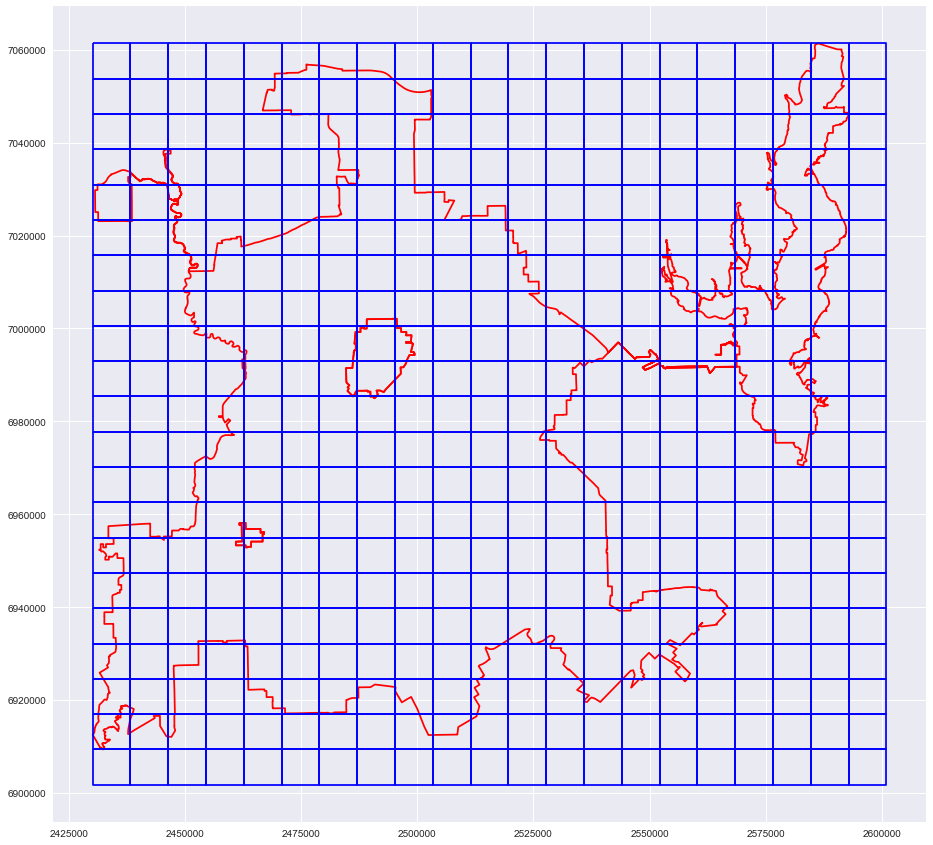

In [44]:
base = points.boundary.plot(color='red',figsize=(20, 15))
grid.boundary.plot(ax=base,color = 'blue',figsize=(20, 15));

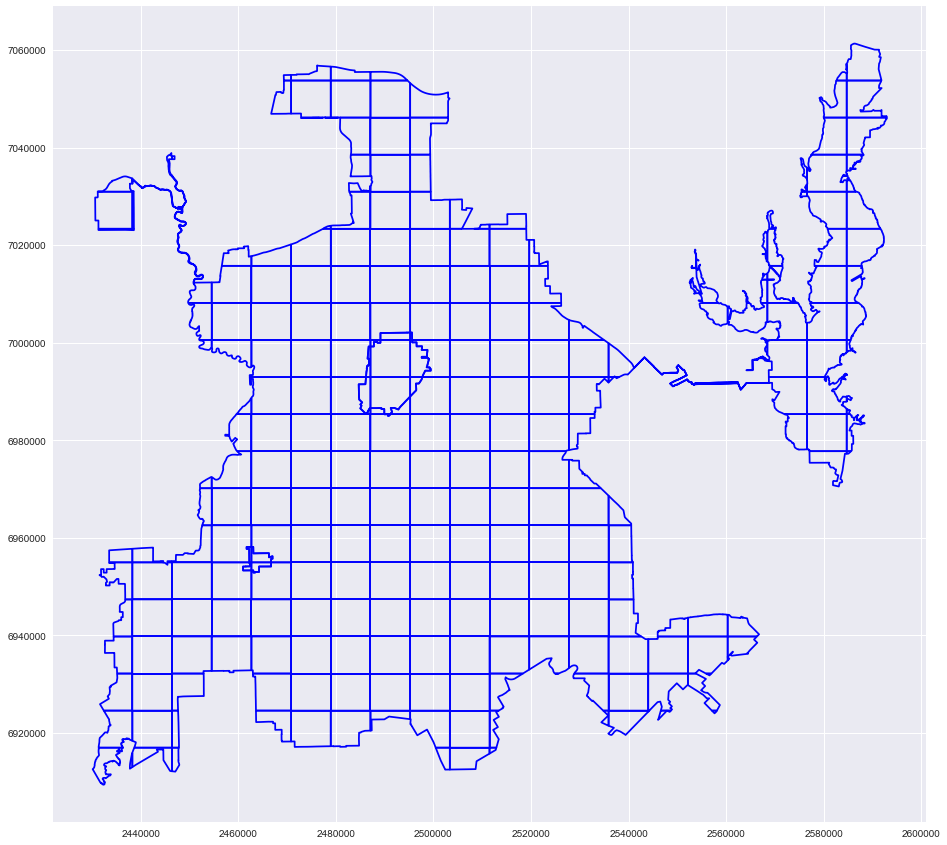

In [45]:
# trim the grid to to match the city borders
grid_trimmed = gpd.overlay(grid, points, how='intersection')
grid_trimmed.boundary.plot(color= 'blue',figsize=(20, 15))

In [46]:
# check number of groupings
grid_trimmed.shape

(276, 1)

In [47]:
# create geo points for each lat/long coordinate
crime_locations = [Point(xy) for xy in zip(data.long, data.lat)]
data['geometry'] = crime_locations
#data_loc_copy.drop(['lat','long'], axis = 1, inplace=True)

In [48]:
# convert dataframe to a geo-dataframe
data_gpd = gpd.GeoDataFrame(data, crs=crs, geometry=crime_locations)

In [49]:
# map each crime lat/long points to the index of the polygon that they fall within
from geopandas.tools import sjoin
data_final = sjoin(data_gpd, grid_trimmed, how='left',op="within")
data_final = data_final.rename(columns={'index_right': 'mapped_region'})

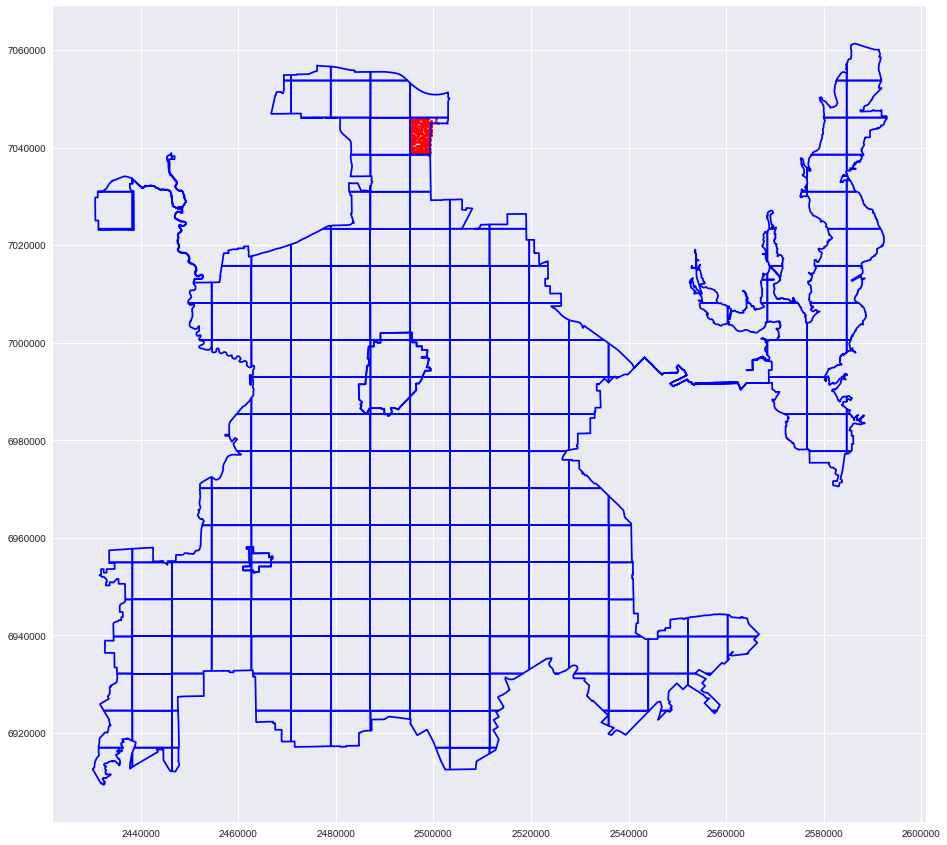

In [50]:
# check if mappings worked
subset_gpd = data_final.loc[(data_final['mapped_region'] == 121),:]

# plot all points that were tagged within index 1 polygon 
base = grid_trimmed.boundary.plot(color='blue',figsize=(20, 15))
subset_gpd.geometry.plot(ax=base,color='red',figsize=(20, 15),markersize=5)

In [51]:
grid_trimmed.shape

(276, 1)

### Dallas CRS 4326


In [52]:
import geopandas as gpd
from shapely.geometry import Polygon, Point
import numpy as np
points = gpd.read_file('FY 2017 City of Dallas City Limits/geo_export_3fa98da0-b3d0-4d56-bebd-89548d145c0e.shp')
points.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [53]:
#points = points.to_crs(epsg=2263)

In [54]:
# get min/max coordinates
xmin,ymin,xmax,ymax =  points.total_bounds

xmax = -96.46367
ymax = 33.02381

xmin = -97.00048
ymin = 32.61332


# figure out the size of square. I wanted even squares, which is why I went with 20x20, but it can be anything.
y_length = (ymax-ymin)/25 
print(y_length)

x_width = (xmax-xmin)/25
print(x_width)

0.016419599999999833
0.021472400000000107


In [55]:
crs = CRS.from_epsg(4326)

height = 0.01641
width = 0.01641

rows = int(np.ceil((ymax-ymin) /  height))
cols = int(np.ceil((xmax-xmin) / width))
 
XleftOrigin = xmin
XrightOrigin = xmin + width
YtopOrigin = ymax
YbottomOrigin = ymax - height

polygons = []
for i in range(cols):
    Ytop = YtopOrigin
    Ybottom =YbottomOrigin
    for j in range(rows):
        polygons.append(Polygon([(XleftOrigin, Ytop), (XrightOrigin, Ytop), (XrightOrigin, Ybottom), (XleftOrigin, Ybottom)])) 
        Ytop = Ytop - height
        Ybottom = Ybottom - height
    XleftOrigin = XleftOrigin + width
    XrightOrigin = XrightOrigin + width

grid = gpd.GeoDataFrame({'geometry':polygons},crs = crs)
grid.to_file("grid_dal_2.shp")

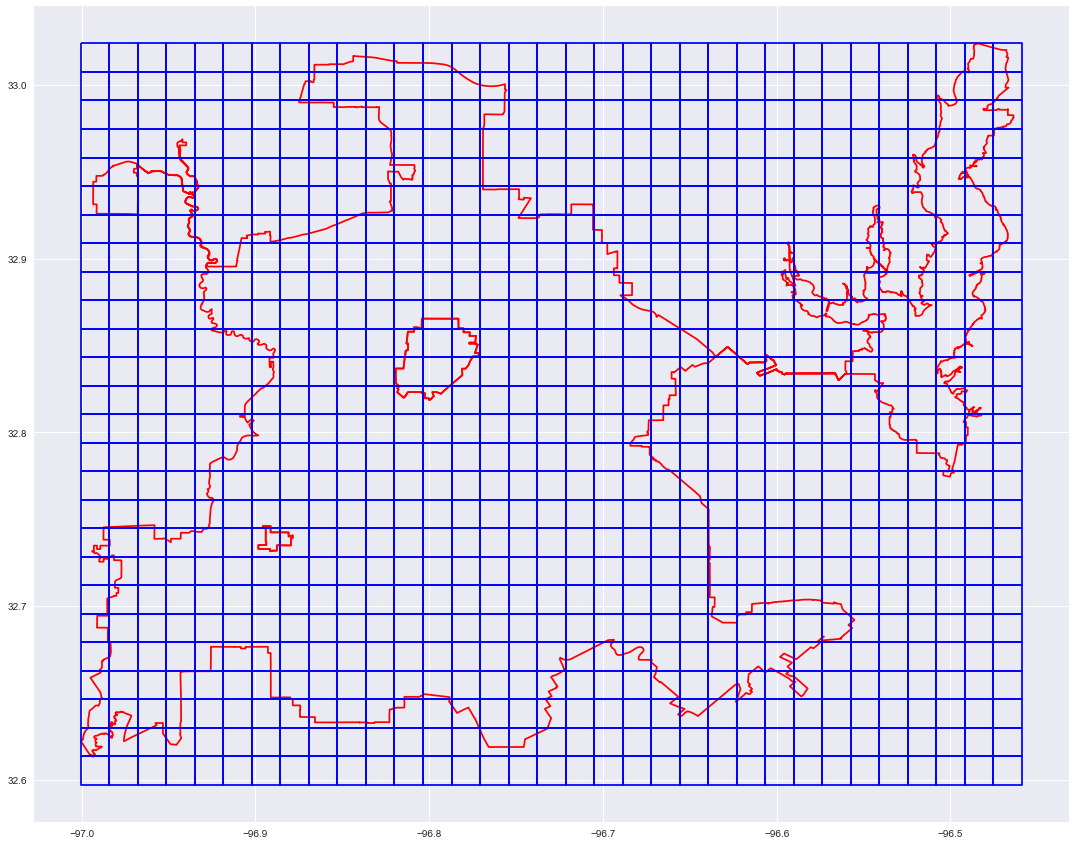

In [56]:
base = points.boundary.plot(color='red',figsize=(20, 15))
grid.boundary.plot(ax=base,color = 'blue',figsize=(20, 15));

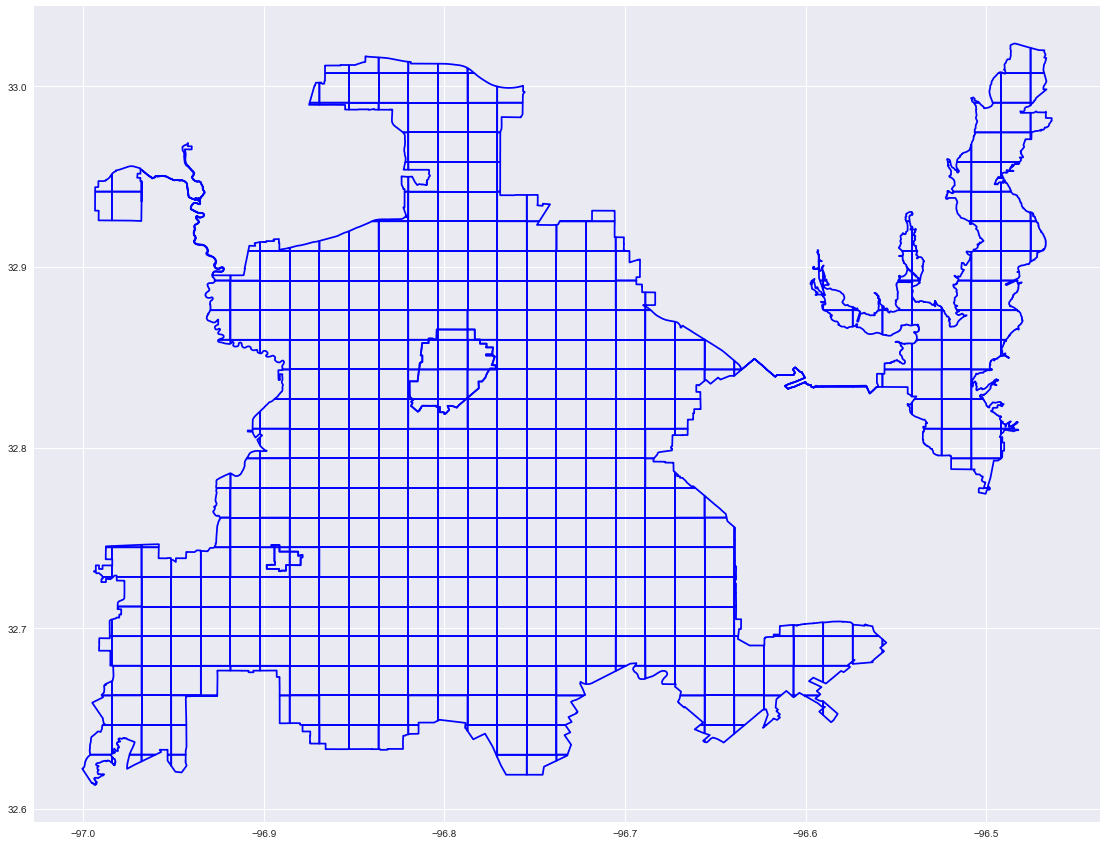

In [57]:
# trim the grid to to match the city borders
grid_trimmed = gpd.overlay(grid, points, how='intersection')
grid_trimmed.boundary.plot(color= 'blue',figsize=(20, 15))

In [58]:
# create geo points for each lat/long coordinate
crime_locations = [Point(xy) for xy in zip(data.long, data.lat)]
data['geometry'] = crime_locations

In [59]:
# convert dataframe to a geo-dataframe
data_gpd = gpd.GeoDataFrame(data, crs=2276, geometry=crime_locations)

In [60]:
data_gpd = data_gpd.to_crs(epsg=4326)

In [61]:
# map each crime lat/long points to the index of the polygon that they fall within
from geopandas.tools import sjoin
data_final = sjoin(data_gpd, grid_trimmed, how='left',op="within")
data_final = data_final.rename(columns={'index_right': 'mapped_region'})

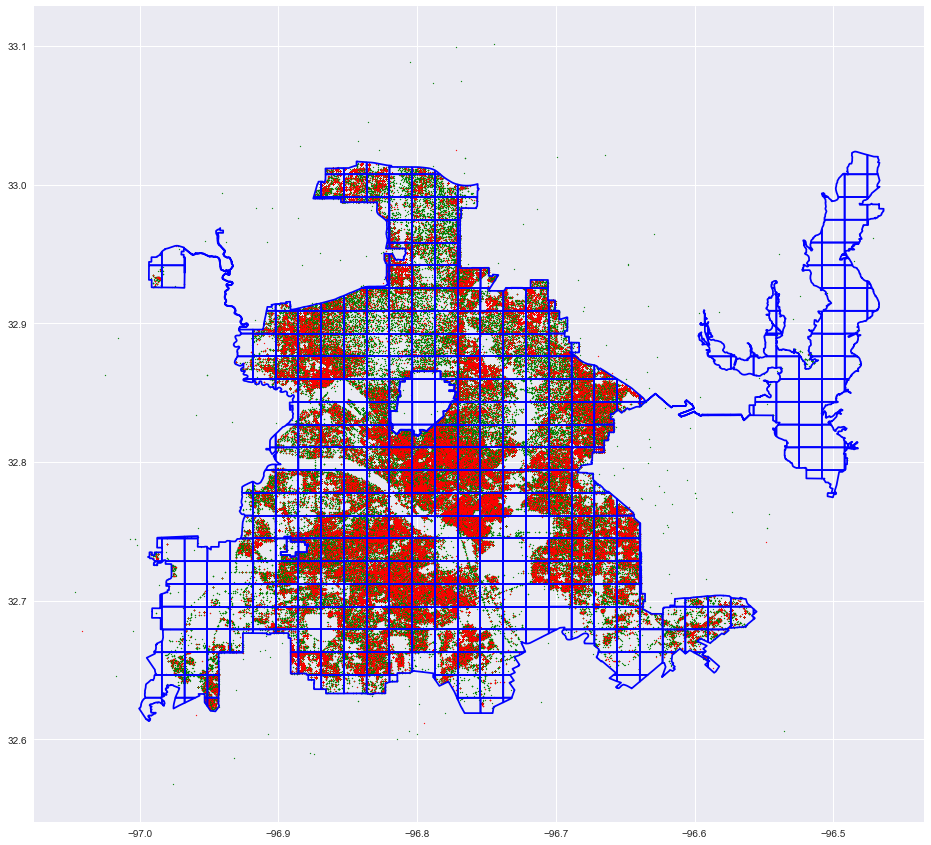

In [62]:
# check if mappings worked
subset_gpd = data_final.loc[(data_final['violent_crime'] == 1),:]
subset_gpd_2 = data_final.loc[(data_final['violent_crime'] == 0),:]

# plot all points that were tagged within index 1 polygon 
base = grid_trimmed.boundary.plot(color='blue',figsize=(20, 15))
subset_gpd_2.geometry.plot(ax=base,color='green',figsize=(20, 15),markersize=1)

subset_gpd.geometry.plot(ax=base,color='red',figsize=(20, 15),markersize=1)

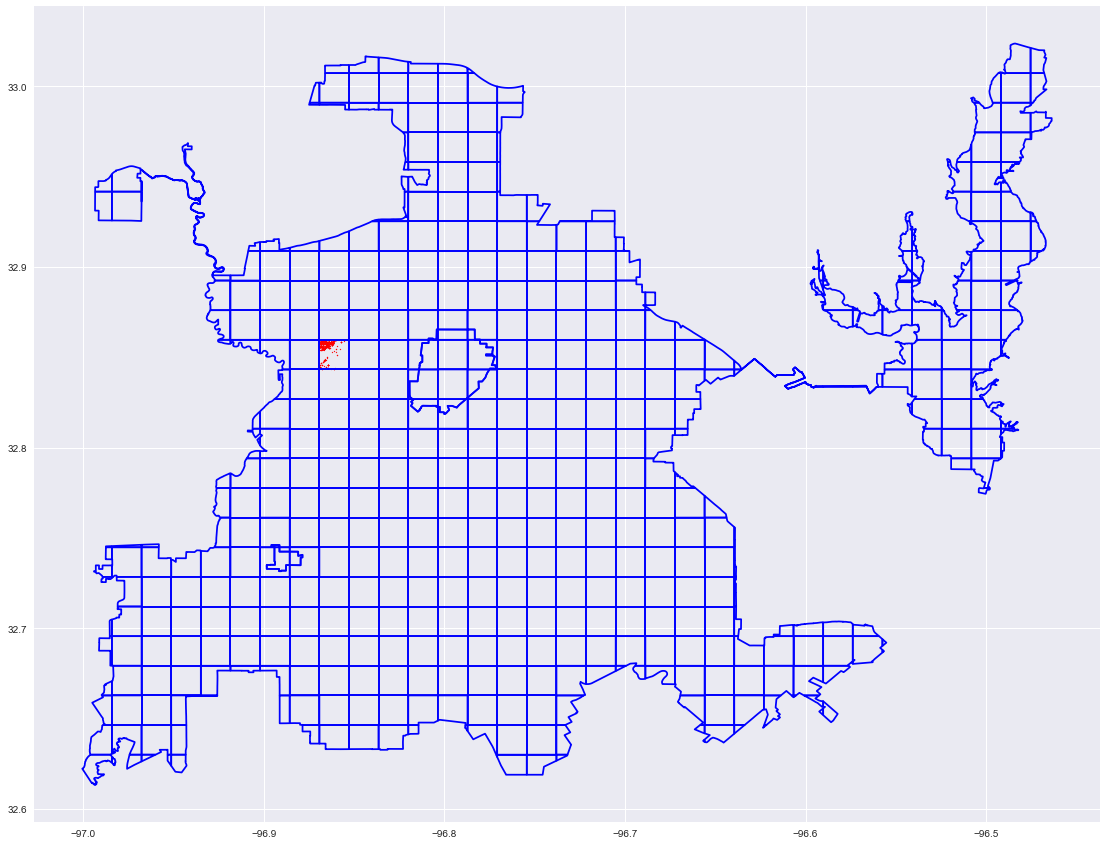

In [104]:
# check if mappings worked
subset_gpd = data_final.loc[(data_final['mapped_region'] == 121),:]


# plot all points that were tagged within index 1 polygon 
base = grid_trimmed.boundary.plot(color='blue',figsize=(20, 15))
subset_gpd.geometry.plot(ax=base,color='red',figsize=(20, 15),markersize=1)

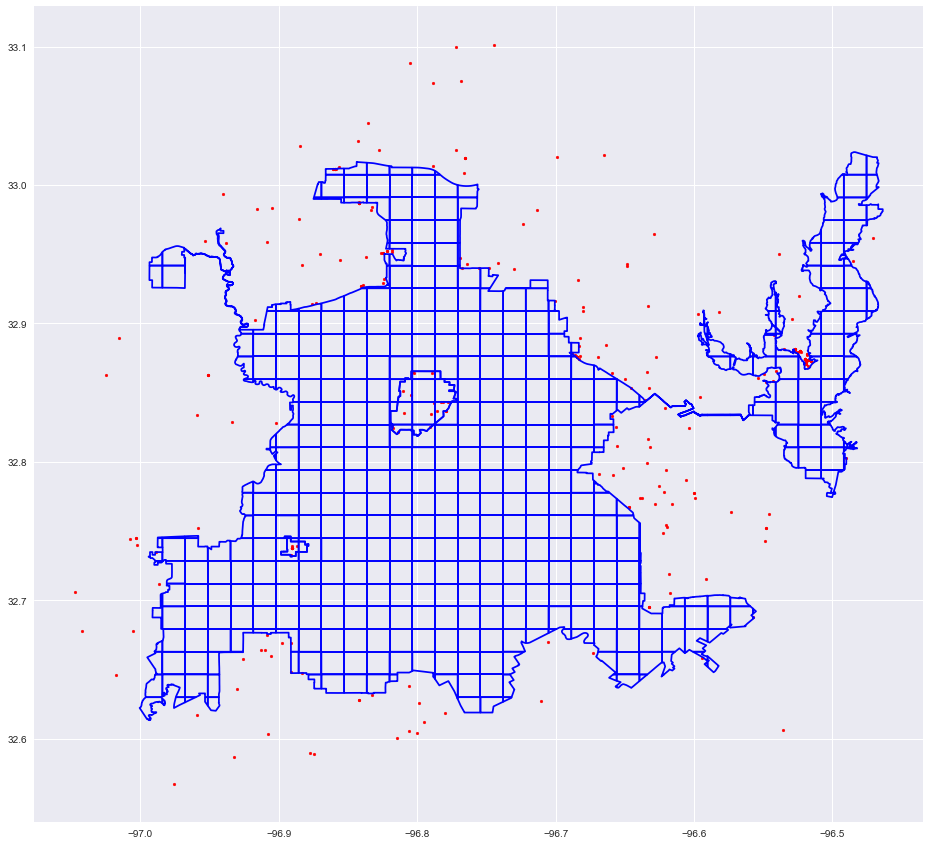

In [103]:
# confirm that points are outside of the grid
subset_gpd = data_final.loc[(data_final['city_right'] == 'Cockrell Hill'),:]
subset_gpd2 = data_final.loc[(data_final['city_right'] == 'Park Cities'),:]
subset_gpd3 = data_final[data_final['city_right'].isnull()]

# plot all points that were tagged within index 1 polygon 
base = grid_trimmed.boundary.plot(color='blue',figsize=(20, 15))
subset_gpd.geometry.plot(ax=base,color='red',figsize=(20, 15),markersize=8)
subset_gpd2.geometry.plot(ax=base,color='red',figsize=(20, 15),markersize=8)
subset_gpd3.geometry.plot(ax=base,color='red',figsize=(20, 15),markersize=8)

In [108]:
grid_trimmed.shape

(512, 4)

In [109]:
# remove squares that are not within dallas city lines
grid_trimmed.drop(grid_trimmed.tail(14).index,inplace=True)

In [110]:
grid_trimmed.shape

(498, 4)

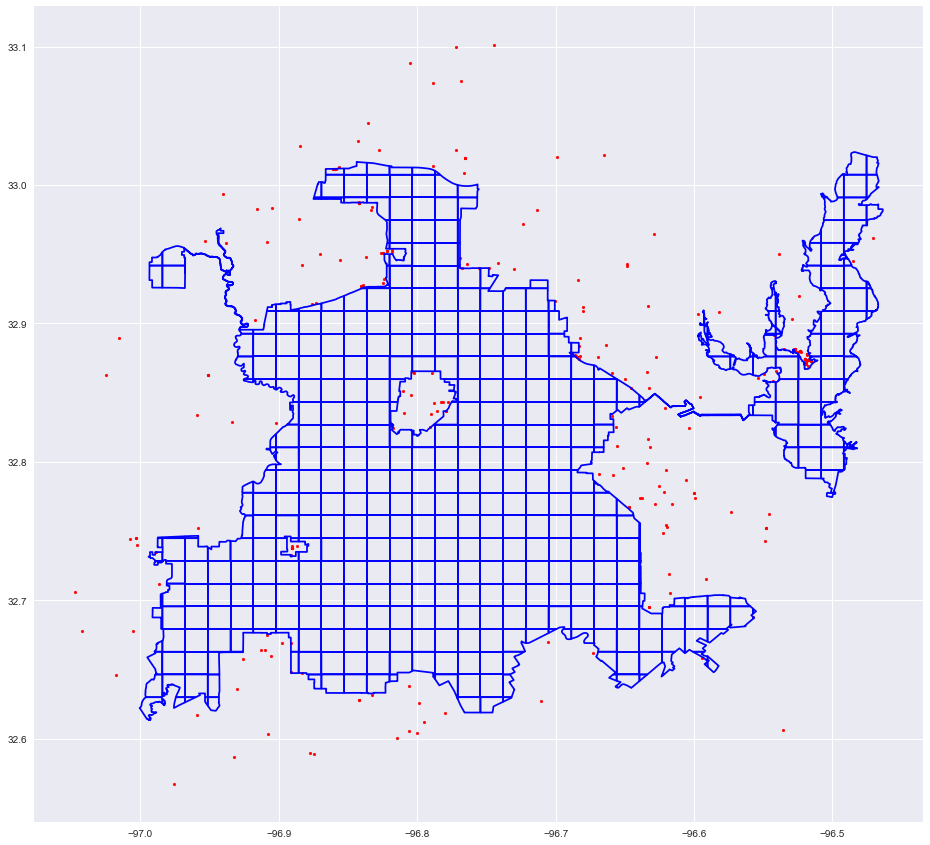

In [113]:
# confirm the trimmed grid is correct
base = grid_trimmed.boundary.plot(color='blue',figsize=(20, 15))
subset_gpd.geometry.plot(ax=base,color='red',figsize=(20, 15),markersize=8)
subset_gpd2.geometry.plot(ax=base,color='red',figsize=(20, 15),markersize=8)
subset_gpd3.geometry.plot(ax=base,color='red',figsize=(20, 15),markersize=8)

In [112]:
# save final grid
grid_trimmed.to_file('grid_trimmed_final.shp')

In [114]:
# remove all crimes outside of dallas city lines
data_final_2 = data_final[data_final.city_right == 'Dallas']

In [125]:
# confirm that the right amount of rows were removed
print(subset_gpd.shape[0]+subset_gpd2.shape[0]+subset_gpd3.shape[0])
print(data_final.shape[0]-data_final_2.shape[0])

300
300


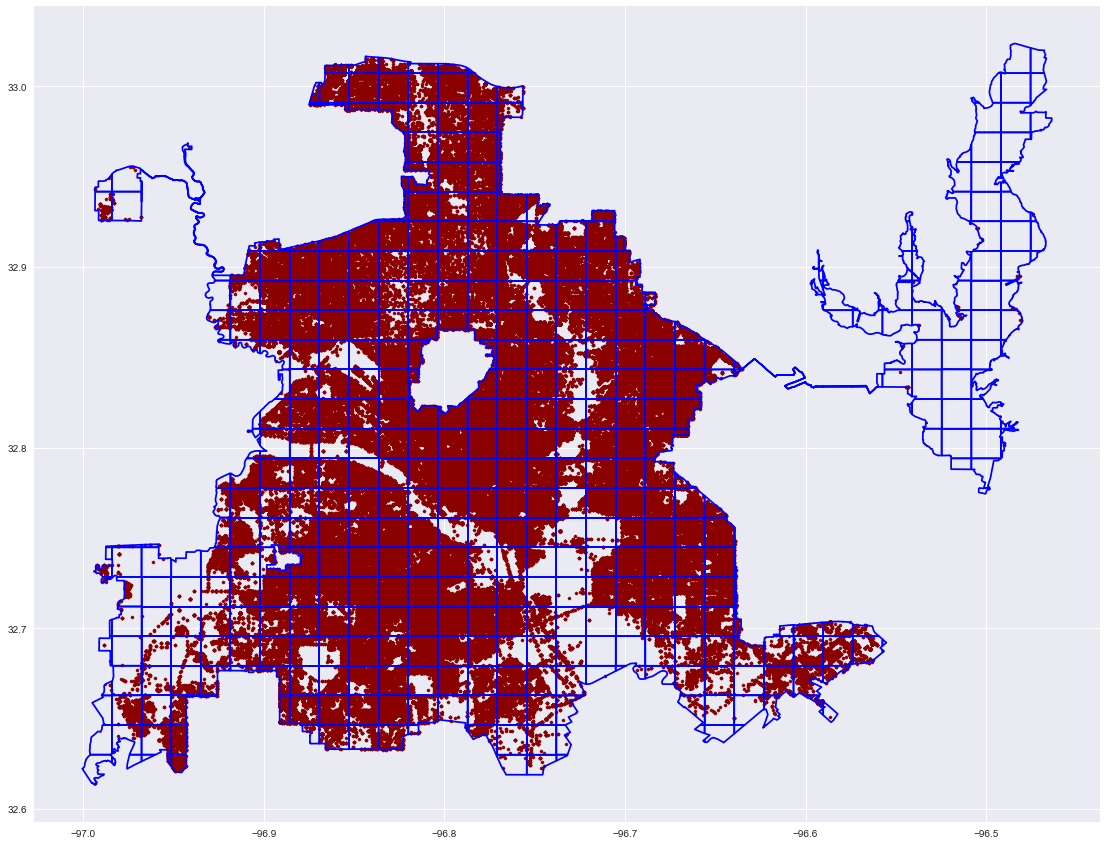

In [130]:
# confirm no points are plotted oustide of the grid
base = grid_trimmed.boundary.plot(color='blue',figsize=(20, 15))
data_final_2.geometry.plot(ax=base,color='darkred',figsize=(20, 15),markersize=10)

In [126]:
data_final_2.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [131]:
# save final data set
data_final_2.to_csv('data_final.csv')

## Census Data
### Census Block Group


In [78]:
import geopandas as gpd
from shapely.geometry import Polygon, Point
import numpy as np
points = gpd.read_file('DallasCountyBlockGroups/NH_DallasCountyBlockGroups2010WithAppraisalRollups.shp')
# if error run this SHAPE_RESTORE_SHX=YES fio info Documents/GitHub/MSDS_AI_Capstone/CityLimit.shp

### API Call to Census Data

zipcode mapping: https://public.opendatasoft.com/explore/dataset/us-zip-code-latitude-and-longitude/table/?q=dallas&refine.state=TX
<br/> census api walkthrough https://towardsdatascience.com/getting-census-data-in-5-easy-steps-a08eeb63995d
<br/> county codes https://www.census.gov/prod/techdoc/cbp/cbp95/st-cnty.pdf


In [79]:
points.crs

<Projected CRS: EPSG:2276>
Name: NAD83 / Texas North Central (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: USA - Texas - SPCS - NC
- bounds: (-103.07, 31.72, -94.0, 34.58)
Coordinate Operation:
- name: SPCS83 Texas North Central zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

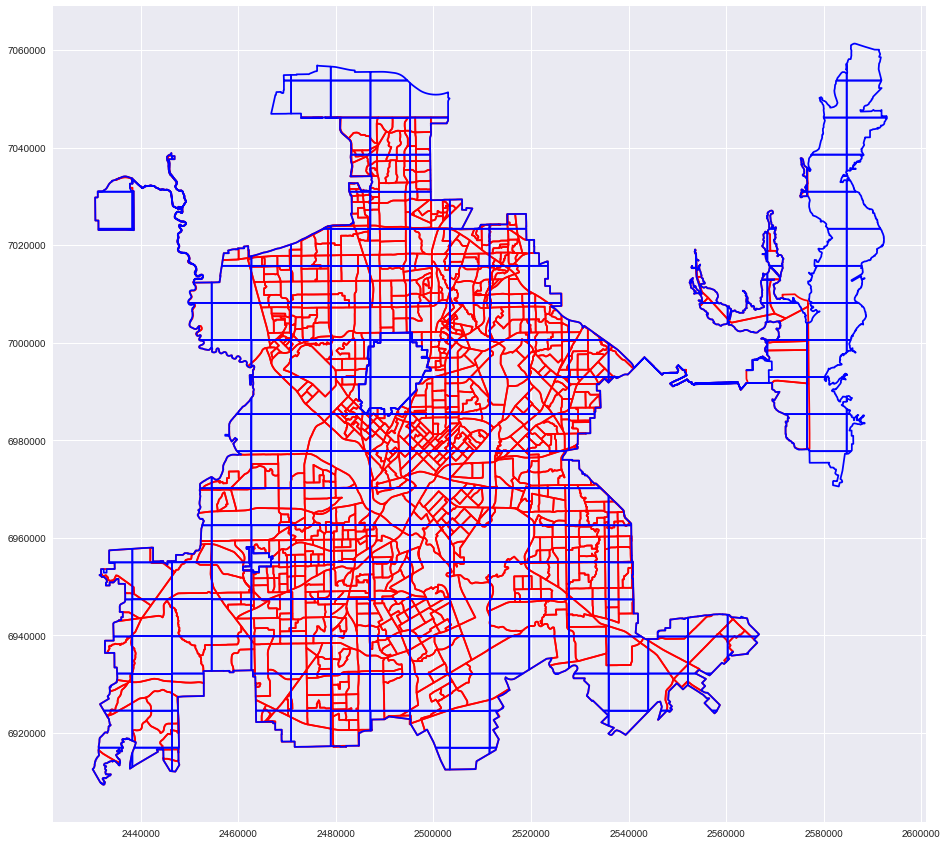

In [80]:
base = points.boundary.plot(color='red',figsize=(20, 15))
grid_trimmed.boundary.plot(ax=base,color='blue',figsize=(20, 15),markersize=5)

In [68]:
#manipulate dataframes in python
import pandas as pd

#make API calls with python
import requests

#allows us to store results of API call cleanly
import json
# api key
apiKey = "d303be19414658afdf53bda4c7a61706df197478"

#construct the API call we will use
baseAPI = "https://api.census.gov/data/2018/acs/acs5?get=B19013_001M&for=block%20group:*&in=state:48%20county:113&key=d303be19414658afdf53bda4c7a61706df197478" 
response = requests.get(baseAPI)

formattedResponse = json.loads(response.text)[1:]
dal_med_income = pd.DataFrame(columns=['median_income', 'state','county','tract','block_group'], data=formattedResponse)


In [91]:
#S2503_C01_013E
#https://api.census.gov/data/2018/acs/acs5/subject/variables.html
                
#manipulate dataframes in python
import pandas as pd

#make API calls with python
import requests

#allows us to store results of API call cleanly
import json
# api key
apiKey = "d303be19414658afdf53bda4c7a61706df197478"

#construct the API call we will use
baseAPI = "https://api.census.gov/data/2018/acs/acs5/subject?get=S2503_C01_013E&for=tract:*&in=state:48&in=county:113&key=d303be19414658afdf53bda4c7a61706df197478" 
response = requests.get(baseAPI)

formattedResponse = json.loads(response.text)[1:]
dal_med_income = pd.DataFrame(columns=['median_income', 'state','county','tract'], data=formattedResponse)

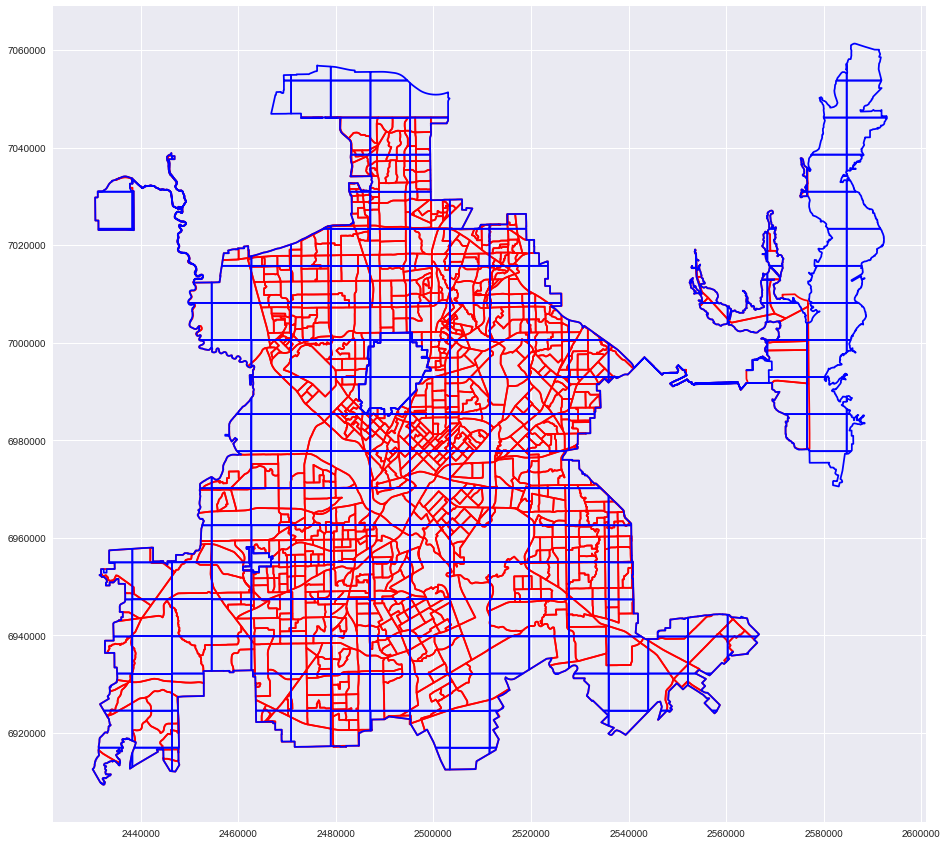

In [93]:
base = points.boundary.plot(color='red',figsize=(20, 15))
grid_trimmed.boundary.plot(ax=base,color='blue',figsize=(20, 15),markersize=5)

In [95]:
tract_points = points[['TRACT','geometry']]
tract_grid = tract_points.dissolve(by='TRACT')

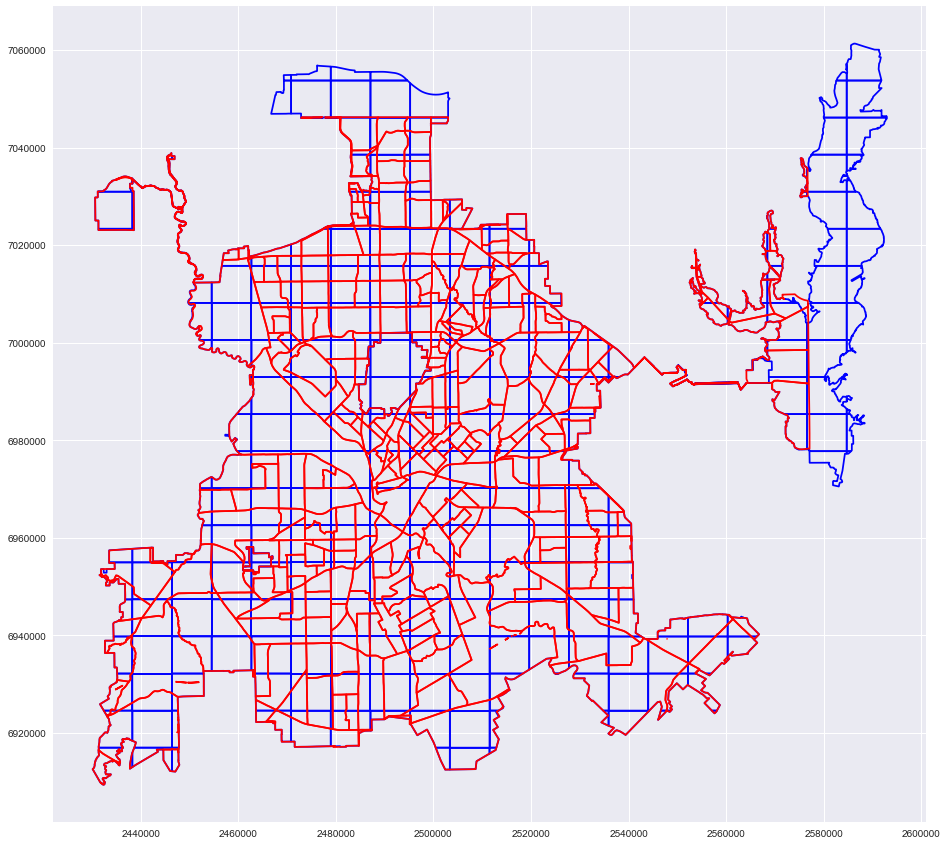

In [98]:
base = grid_trimmed.boundary.plot(color='blue',figsize=(20, 15))
tract_grid.boundary.plot(ax=base,color='red',figsize=(20, 15),markersize=5)

### Zip Code Block Group

In [268]:
points_zip = gpd.read_file('2010_Census_5-digit_ZIP_Code_Tabulation_Areas-shp/2010_Census_5-digit_ZIP_Code_Tabulation_Areas.shp')
# if error run this SHAPE_RESTORE_SHX=YES fio info Documents/GitHub/MSDS_AI_Capstone/CityLimit.shp
points_zip.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [270]:
# trim the grid to to match the city borders
zip_trimmed = gpd.overlay(points_zip, points, how='intersection')


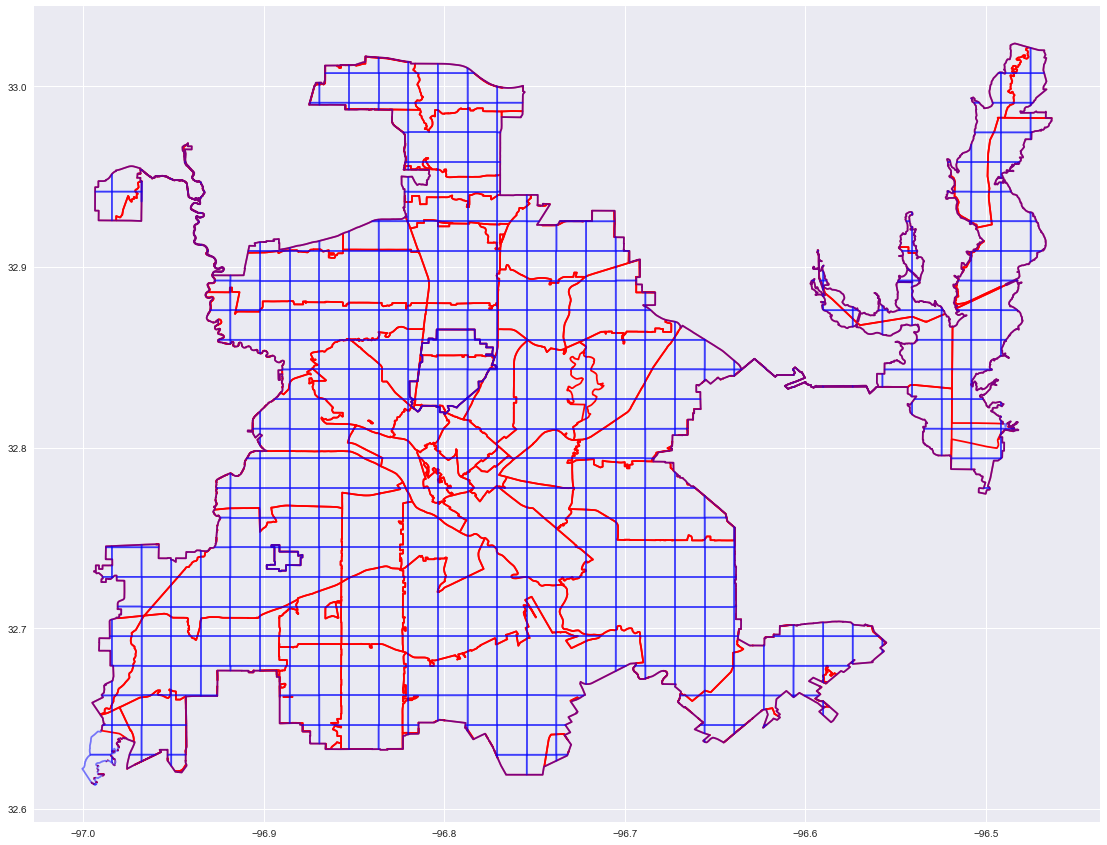

In [273]:
base = zip_trimmed.boundary.plot(color='red',figsize=(20, 15))
grid_trimmed.boundary.plot(ax=base,color='blue',figsize=(20, 15),markersize=5, alpha = 0.5)

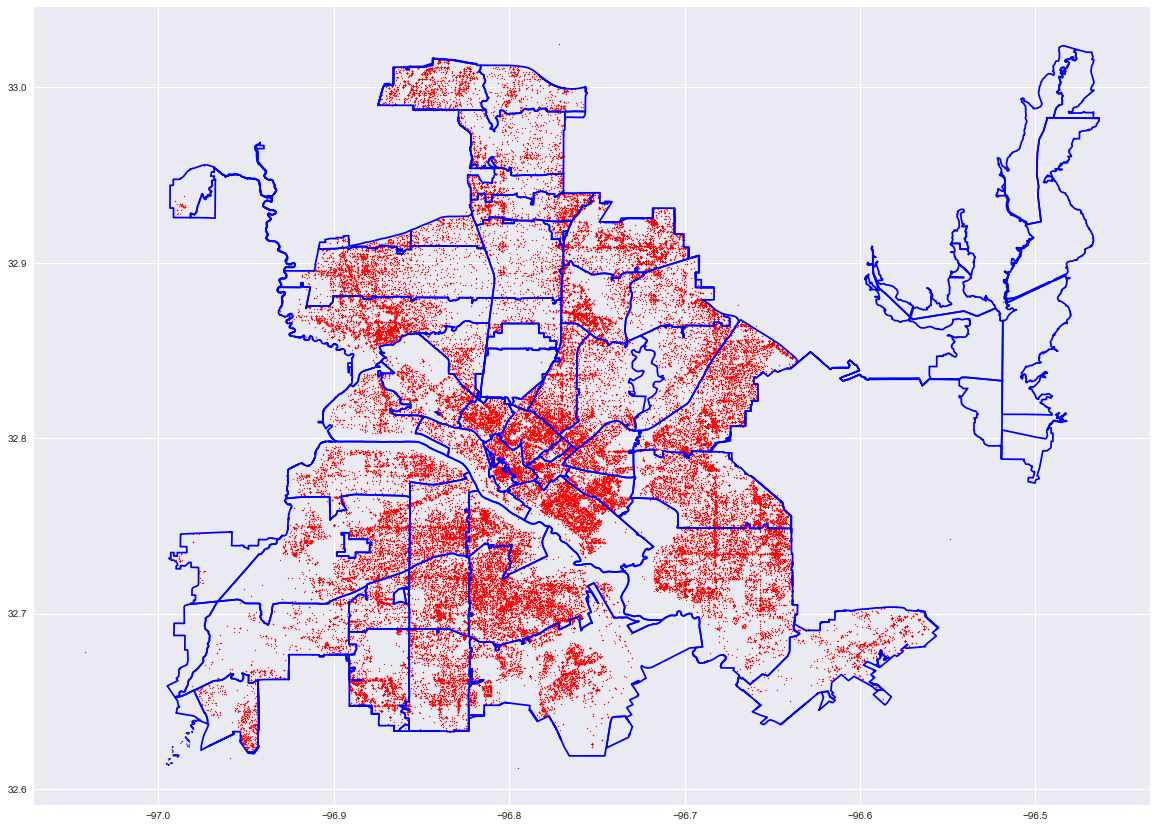

In [275]:
# check if mappings worked
subset_gpd = data_final.loc[(data_final['violent_crime'] == 1),:]
subset_gpd_2 = data_final.loc[(data_final['violent_crime'] == 0),:]

# plot all points that were tagged within index 1 polygon 
base = zip_trimmed.boundary.plot(color='blue',figsize=(20, 15))
subset_gpd.geometry.plot(ax=base,color='red',figsize=(20, 15),markersize=1)

## Sunset/Sunrise API

https://sunrise-sunset.org/api

In [351]:
import json
import requests
from datetime import timedelta, date, time

start_date = date(2014, 1, 1)
end_date = date(2020, 6, 1)
temp = []

def daterange(start_date, end_date):
    for n in range(int ((end_date - start_date).days)):
        yield start_date + timedelta(n)

for single_date in daterange(start_date, end_date):
    api_call = requests.get('https://api.sunrise-sunset.org/json?lat=32.7764022&lng=-96.7968437&date=%s'%single_date)
    sunset_sunrise= api_call.json()['results']
    temp.append({'date':single_date,'sunrise_utc':sunset_sunrise['sunrise'],'sunset_utc':sunset_sunrise['sunset']})

sunrise_sunset_df = pd.DataFrame(temp)

In [352]:
sunrise_sunset_df.head()

date sunrise_utc   sunset_utc
0  2014-01-01  1:29:42 PM  11:32:30 PM
1  2014-01-02  1:29:52 PM  11:33:15 PM
2  2014-01-03  1:30:01 PM  11:34:01 PM
3  2014-01-04  1:30:08 PM  11:34:48 PM
4  2014-01-05  1:30:13 PM  11:35:36 PM

In [357]:
sunrise_sunset_df.dtypes

date           object
sunrise_utc    object
sunset_utc     object
dtype: object

In [382]:
# convert time to 24-hour clock
sunrise_sunset_df['sunrise_utc_2'] = sunrise_sunset_df['sunrise_utc'].apply(lambda x:  datetime.strptime(x, '%I:%M:%S %p').strftime("%H:%M:%S"))
sunrise_sunset_df['sunset_utc_2'] = sunrise_sunset_df['sunset_utc'].apply(lambda x:  datetime.strptime(x, '%I:%M:%S %p').strftime("%H:%M:%S"))


In [384]:

sunrise_sunset_df['sunrise_utc_3'] = sunrise_sunset_df['sunrise_utc_2'].apply(lambda x: datetime.strptime(x,"%H:%M:%S").time())
sunrise_sunset_df['sunset_utc_3'] = sunrise_sunset_df['sunset_utc_2'].apply(lambda x: datetime.strptime(x,"%H:%M:%S").time())


In [385]:
sunrise_sunset_df['sunrise_utc_date'] = sunrise_sunset_df.apply(lambda r : pd.datetime.combine(r['date'],r['sunrise_utc_3']),1)
sunrise_sunset_df['sunset_utc_date'] = sunrise_sunset_df.apply(lambda r : pd.datetime.combine(r['date'],r['sunset_utc_3']),1)
    

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning:

The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.



In [386]:
sunrise_sunset_df.head()

date sunrise_utc   sunset_utc sunrise_utc_2 sunset_utc_2  \
0  2014-01-01  1:29:42 PM  11:32:30 PM      13:29:42     23:32:30   
1  2014-01-02  1:29:52 PM  11:33:15 PM      13:29:52     23:33:15   
2  2014-01-03  1:30:01 PM  11:34:01 PM      13:30:01     23:34:01   
3  2014-01-04  1:30:08 PM  11:34:48 PM      13:30:08     23:34:48   
4  2014-01-05  1:30:13 PM  11:35:36 PM      13:30:13     23:35:36   

  sunset_utc_final sunrise_utc_3 sunset_utc_3    sunrise_utc_date  \
0         23:32:30      13:29:42     23:32:30 2014-01-01 13:29:42   
1         23:33:15      13:29:52     23:33:15 2014-01-02 13:29:52   
2         23:34:01      13:30:01     23:34:01 2014-01-03 13:30:01   
3         23:34:48      13:30:08     23:34:48 2014-01-04 13:30:08   
4         23:35:36      13:30:13     23:35:36 2014-01-05 13:30:13   

      sunset_utc_date  
0 2014-01-01 23:32:30  
1 2014-01-02 23:33:15  
2 2014-01-03 23:34:01  
3 2014-01-04 23:34:48  
4 2014-01-05 23:35:36

In [400]:
sunrise_sunset_df['sunrise_central'] = sunrise_sunset_df['sunrise_utc_date'].dt.tz_convert('US/Central')
sunrise_sunset_df['sunset_central'] = sunrise_sunset_df['sunset_utc_date'].dt.tz_convert('US/Central')

In [398]:
sunrise_sunset_df.head()

date sunrise_utc   sunset_utc sunrise_utc_2 sunset_utc_2  \
0  2014-01-01  1:29:42 PM  11:32:30 PM      13:29:42     23:32:30   
1  2014-01-02  1:29:52 PM  11:33:15 PM      13:29:52     23:33:15   
2  2014-01-03  1:30:01 PM  11:34:01 PM      13:30:01     23:34:01   
3  2014-01-04  1:30:08 PM  11:34:48 PM      13:30:08     23:34:48   
4  2014-01-05  1:30:13 PM  11:35:36 PM      13:30:13     23:35:36   

  sunset_utc_final sunrise_utc_3 sunset_utc_3          sunrise_utc_date  \
0         23:32:30      13:29:42     23:32:30 2014-01-01 13:29:42+00:00   
1         23:33:15      13:29:52     23:33:15 2014-01-02 13:29:52+00:00   
2         23:34:01      13:30:01     23:34:01 2014-01-03 13:30:01+00:00   
3         23:34:48      13:30:08     23:34:48 2014-01-04 13:30:08+00:00   
4         23:35:36      13:30:13     23:35:36 2014-01-05 13:30:13+00:00   

            sunset_utc_date           sunrise_central  \
0 2014-01-01 23:32:30+00:00 2014-01-01 07:29:42-06:00   
1 2014-01-02 23:33:15+00:00 2014-01-02 07:29:52-06:00   
2 2014-01-03 23:34:01+00:00 2014-01-03 07:30:01-06:00   
3 2014-01-04 23:34:48+00:00 2014-01-04 07:30:08-06:00   
4 2014-01-05 23:35:36+00:00 2014-01-05 07:30:13-06:00   

             sunset_central  
0 2014-01-01 17:32:30-06:00  
1 2014-01-02 17:33:15-06:00  
2 2014-01-03 17:34:01-06:00  
3 2014-01-04 17:34:48-06:00  
4 2014-01-05 17:35:36-06:00

In [404]:
sunrise_sunset_df['sunrise_time_ct'] = [datetime.time(d) for d in sunrise_sunset_df['sunrise_central']] 
sunrise_sunset_df['sunset_time_ct'] = [datetime.time(d) for d in sunrise_sunset_df['sunset_central']] 

In [435]:
sunrise_sunset_by_date = sunrise_sunset_df[['date','sunrise_time_ct','sunset_time_ct']]

In [424]:
sunrise_sunset_by_date.to_csv('sunrise_sunset_by_date.csv')

In [437]:
sunrise_sunset_by_date['date'] = pd.to_datetime(sunrise_sunset_by_date['date'])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



date sunrise_time_ct sunset_time_ct
0 2014-01-01        07:29:42       17:32:30

In [440]:
sunrise_sunset_by_date.loc[(sunrise_sunset_by_date['date'] == '2020-02-01'),:]

date sunrise_time_ct sunset_time_ct
2222 2020-02-01        07:21:43       17:59:50

### Weather API


In [1]:
pip install wwo-hist

  Created wheel for wwo-hist: filename=wwo_hist-0.0.4-py3-none-any.whl size=4214 sha256=39e9928cafaad5a7af2e2e46086b5dbc2a945b201cdc68d73137a43bc5c024c8
  Stored in directory: /Users/ksenialuu/Library/Caches/pip/wheels/47/67/a6/977ac091198b98e5133420721fc4d04575c8db9564e02c8759
Successfully built wwo-hist
Note: you may need to restart the kernel to use updated packages.


In [2]:
from wwo_hist import retrieve_hist_data
import os

In [8]:
os.getcwdb()

b'/Users/ksenialuu/Documents/GitHub/MSDS_AI_Capstone/ksenia_luu'

In [10]:
frequency=24
start_date = '01-Jun-2014'
end_date = '01-Jan-2020'
api_key = 'a855c96c1fba45bcaae222727202805'
location_list = ['dallas,tx']
hist_weather_data = retrieve_hist_data(api_key,
                                location_list,
                                start_date,
                                end_date,
                                frequency,
                                location_label = False,
                                export_csv = True,
                                store_df = True) 



Retrieving weather data for dallas,tx


Currently retrieving data for dallas,tx: from 2014-06-01 to 2014-06-30
Time elapsed (hh:mm:ss.ms) 0:00:01.345669
Currently retrieving data for dallas,tx: from 2014-07-01 to 2014-07-31
Time elapsed (hh:mm:ss.ms) 0:00:02.459199
Currently retrieving data for dallas,tx: from 2014-08-01 to 2014-08-31
Time elapsed (hh:mm:ss.ms) 0:00:03.488849
Currently retrieving data for dallas,tx: from 2014-09-01 to 2014-09-30
Time elapsed (hh:mm:ss.ms) 0:00:04.677648
Currently retrieving data for dallas,tx: from 2014-10-01 to 2014-10-31
Time elapsed (hh:mm:ss.ms) 0:00:05.926890
Currently retrieving data for dallas,tx: from 2014-11-01 to 2014-11-30
Time elapsed (hh:mm:ss.ms) 0:00:07.102125
Currently retrieving data for dallas,tx: from 2014-12-01 to 2014-12-31
Time elapsed (hh:mm:ss.ms) 0:00:08.385436
Currently retrieving data for dallas,tx: from 2015-01-01 to 2015-01-31
Time elapsed (hh:mm:ss.ms) 0:00:09.367340
Currently retrieving data for dallas,tx: from 2015-02-